## Exercise in Photogrammetry I
## **Ex.3 : Histograms and Image Transformations**
### Hand out: xx.xx.xxxx
### Submission: xx.xx.xxxx 
### Points: 17

## A. Histogram Basics *(10 points)*
In this exercise, you will learn how to apply image transformations and how to compute histograms. Whenever you define a **function** write a **docstring** which gives details about the function itself as well as input and output.

For example: 
```
def my_function(arg1, arg2):
    """ Explain what your function does.

    Args:
        arg1: Explain the first argument.
        arg2: Explain the second argument.

    Returns:
        Give details about the return value.
    """
    ...
    return True
```

**Tasks:**
1. import all necessary modules to modify, load and visualize images *(0 points)*
2. Load ```images/cube.jpg``` as a **grayscale** image. Make sure that the pixels are within [0, 255] and the underlying datatype is *uint8*. Finally visualize the image and print out its minimum and maximum value as well as its data type. *(2 points)*
3. Define a **function** ```histogram(image)``` which takes as input an image [np.array] and returns its histogram [np.array]. The histogram should have 256 bins. Do not use built-in python functions which compute the histogram for you! *(3 points)*
4. Define a **function** ```cumulativeHistogram(hist)``` which takes as input a histogram [np.array] and returns the cumulative histogram [np.array]. The histogram should have 256 bins as well. *(3 points)*
5. **Compute** the **histogram** and **cumulative histogram** of the grayscale cube image by calling your previously defined functions. <br>Finally, **plot** the results and assign proper **labels** to both **axis**. *(2 points)*
<br>**Hint:** use ```plt.bar(...)``` for the histogram and ```plt.plot(...)``` for the cumulative histogram.

In [1]:
# 1. Import modules
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

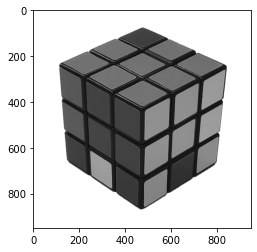

In [2]:
# 2. Load and visualize image

# path
filename='images/cube.jpg'

image_gray=skimage.io.imread(filename,as_gray=True)
# Convert to 8-bit uint.
image_gray=img_as_ubyte(image_gray)
plt.imshow(image_gray,cmap='gray')

In [3]:
# Print out the minimum and maximum value of the displayed image as well as its data type
print('Underlying data type of image:',image_gray.dtype)
print('Maximum value of displayed image:',image_gray.max())
print('Minimum value of displayed image:',image_gray.min())

Underlying data type of image: uint8
Maximum value of displayed image: 255
Minimum value of displayed image: 0


In [4]:
# 3. Define your function called histogram(image) here:
def histogram(image):
    ''' Returns a image histogram of occurences based on grayscale intensity value (from 0-255)
    Args:
        Image:Numpy array (uint8) containing values from 0-255
    
    Returns:
        Numpy array that counts the number of pixel in the image
    '''
    h=np.zeros(256)
    I=image.shape[0]
    J=image.shape[1]

    for i in range(0,I):
        for j in range(0,J):
            h[image[i,j]]+=1
    
    # convert to integer as the datatype before will be float
    h=h.astype('int')
    return h

In [5]:
def histogram_np(image):
    ''' Returns a image histogram of occurences based on grayscale intensity value (from 0-255)
    Args:
        Image:Numpy array (uint8) containing values from 0-255
    
    Returns:
        Numpy array that counts the number of pixel in the image
    '''
    hist_np,_=np.histogram(image,bins=range(257))
    
    # convert to integer as the datatype before will be float

    return hist_np

In [6]:
hist_np,bin_edges=np.histogram(image_gray,bins=range(256))
print(hist_np)




[    37     74    170    212    261    248    353    358    463    562
    691    841    976   1126   1354   1518   1820   1904   2080   2355
   2962   3587   4648   5788   6974   6380   5998   5791   5195   4880
   4945   3933   3074   2903   2554   2253   2003   1813   1695   1619
   1389   1325   1208   1120   1111   1201   1787   2623   2232   2279
   1565   1442   1754   1660   1126   1279   2294   5342   2969   1520
   1262   2319   3603   4287   6374  13150  15285  10485   4653   3677
   1469   1093    900    803    808    663    627    561    513    525
    520    473    510    550    570    880   2365   4128   3873   3959
   3590   1477    998    606    533    471    367    332    320    303
    285    249    263    281    302    376    463    553    769   1299
   2513   4678   8353  12535  15627  16658   8055   2848   1336    920
    725    616    555    502    481    501    495    550   1081   1324
   2078   2670   3213   2556   1397   1250   1491   2405   3368   3670
   413

In [7]:
def cumulativeHistogram(hist):
    '''Takes as input a 256-bins histogram [np.array] and returns the cumulative histogram [np.array]
    Args:
        hist:numpy array
    Returns:
        cumulative histogram:numpy array
    ''' 
    H=np.zeros(256)
    x=hist.shape[0]
    H[0]=hist[0]
    for i in range(1,x):
        H[i]=hist[i]+H[i-1]
    H=H.astype('int') 
    return H

In [8]:
# numpy implementation
# 4. Define your function called cumulativeHistogram(hist) here:
def cumulativeHistogram_np(hist):
    '''Takes as input a 256-bins histogram [np.array] and returns the cumulative histogram [np.array]
    Args:
        hist:numpy array
    Returns:
        cumulative histogram:numpy array
    ''' 
    
    return np.cumsum(hist)

Text(0.5, 0, 'Intensity Value')

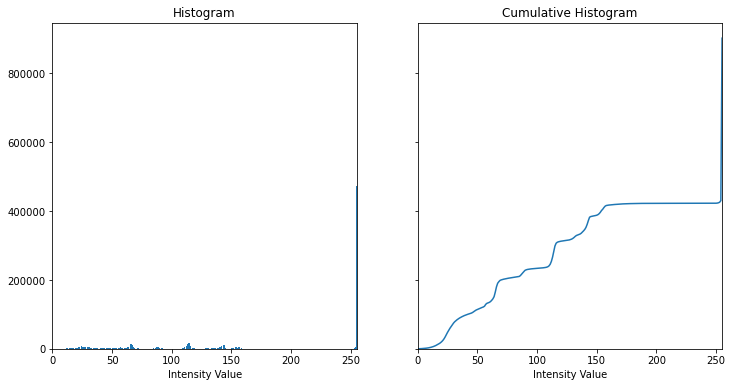

In [9]:
# 5. Compute the histogram and cumulative Histogram
# histogram
hist=histogram(image_gray)
H=cumulativeHistogram(hist)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6),sharey=True,sharex=True)
ax1.bar(x=range(0,256),height=hist)
ax1.set_title('Histogram')
ax1.set_xlim(0,255)
ax1.set_xlabel('Intensity Value')

ax2.plot(H)
ax2.set_title('Cumulative Histogram')
ax2.set_xlabel('Intensity Value')

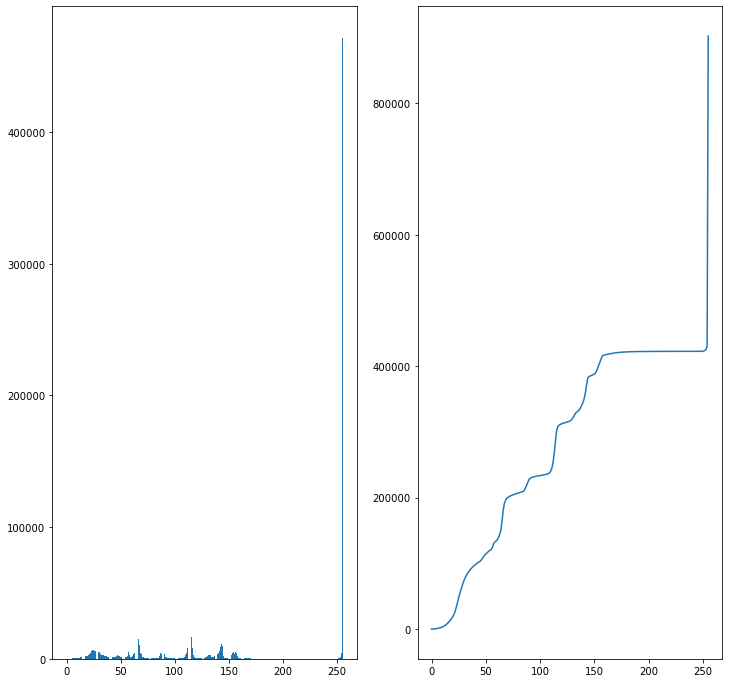

In [10]:
# numpy implementation
h_np=histogram_np(image_gray)
H_np=cumulativeHistogram_np(h_np)



fig,axs=plt.subplots(1,2,figsize=(12,12))

axs[0].bar(x=range(0,256),height=h_np)
axs[1].plot(H_np)
plt.show()

## B. Histogram Equalization *(7 points)*
You have learned the concept for **histogram equalization** in the lecture. It transforms the image such that all intensities are used equally often. 

**Tasks:**
1. Define a **function** ```imageEqualization(image)``` which takes an image as input and returns the transformed image after applying the histogram equalization. *(3 points)*
2. **Compute** the **equalized** grayscale **cube image** and **visualize** it next to the original image. Set the title of each image properly. **Explain** your **observations** in the markdown cell below. *(2 points)*
3. **Compute** the **histogram** and **cumulative histogram** of the equalized image. **Plot** both histograms. In the markdown cell below **describe** the **differences** with respect to the original histograms. *(2 points)*

In [11]:
# 1. Define your function called imageEqualization(image) here:
def imageEqualization(image):
    transformed=np.zeros(image.shape)
    
    N=image.shape[0]*image.shape[1]
    h=histogram(image)
    H=cumulativeHistogram(h)
    
    # point operator for histogram equalization
    f=np.zeros(256)
    for i in range(0,256):
        f[i]=np.round(255*(H[i]-H[0])/(N-H[0]))
    f=f.astype(np.uint8)
    transformed=f[image]
    return transformed

In [12]:
# numpy implementation for imageEqualization(image)

def imageEqualization_np(image):
    N=image.shape[0]*image.shape[1]
    h=histogram_np(image)
    H=cumulativeHistogram(h)

    f=np.round(255*(H-H[0])/(N-H[0]))
    f=f.astype(np.uint8)
    transformed =f[image]
    return transformed


# ![title](images/explain.jpg)

In [24]:

# simpler formula

def imageEqualization_ver_2(image):
    h=histogram_np(image)

    lowest=np.min(h)
    highest=np.max(h)

    f=np.round((h-lowest)*255*1/(highest-lowest))
    f=f.astype(np.uint8)
    transformed =f[image]
    return transformed


True
False
0


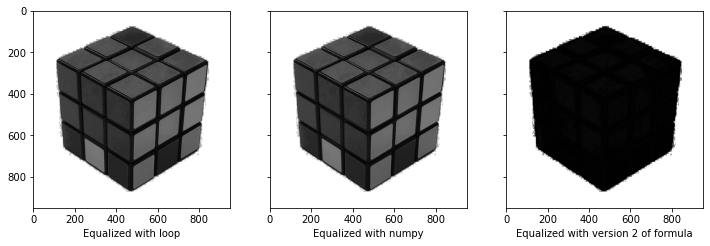

In [27]:
A=imageEqualization(image_gray)
B=imageEqualization_np(image_gray)
C=imageEqualization_ver_2(image_gray)
print(np.array_equal(A,B))
print(np.array_equal(A,C))


f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(12,18))
ax1.imshow(A,cmap='gray')
ax1.set_xlabel('Equalized with loop')
ax2.imshow(B,cmap='gray')
ax2.set_xlabel('Equalized with numpy')
ax3.imshow(C,cmap='gray')
ax3.set_xlabel('Equalized with version 2 of formula')
print(C.min())

### Explaining  what does imageEqualization function does

#### To start of, let us examine an example of indexing into a 2-dimensional numpy array

In [14]:

array_distribution = np.array([0,0,1,1,2,2,2,2,3,3])
array_2d = np.array([[1,2,3,4,5],[5,4,3,2,1],[2,2,3,3,9],[2,2,2,2,9],[4,5,7,8,7]])

print('array_distribution mapping')
for idx,val in enumerate(a):   
    print(f'Index {idx}: {val}')

print('\narray_2d:\n',b)
print('array_2d shape:',array_2d.shape)

transformed=array_distribution[array_2d]
print('\ntransformed:\n',transformed)
print('transformed shape:',array_2d.shape)

array_distribution mapping


NameError: name 'a' is not defined

#### Now, let us inspect what does f in imageEqualization does

In [ ]:
def testing_imageEqualization_f(image):    
    h=histogram(image)
    H=cumulativeHistogram(h)
    f=np.zeros(256)

    for i in range(0,256):
        f[i]=np.round(255*(H[i]-H[0]))/(H[255]-H[0])
    f=f.astype('uint8')
    return f

In [ ]:
point_operator=testing_imageEqualization_f(image_gray)

for idx,val in enumerate(point_operator):   
    print(f'Index {idx}: {val}')

Index 0: 0
Index 1: 0
Index 2: 0
Index 3: 0
Index 4: 0
Index 5: 0
Index 6: 0
Index 7: 0
Index 8: 0
Index 9: 0
Index 10: 0
Index 11: 1
Index 12: 1
Index 13: 1
Index 14: 2
Index 15: 2
Index 16: 3
Index 17: 3
Index 18: 4
Index 19: 4
Index 20: 5
Index 21: 6
Index 22: 8
Index 23: 9
Index 24: 11
Index 25: 13
Index 26: 15
Index 27: 16
Index 28: 18
Index 29: 19
Index 30: 21
Index 31: 22
Index 32: 23
Index 33: 23
Index 34: 24
Index 35: 25
Index 36: 25
Index 37: 26
Index 38: 26
Index 39: 27
Index 40: 27
Index 41: 27
Index 42: 28
Index 43: 28
Index 44: 28
Index 45: 29
Index 46: 29
Index 47: 30
Index 48: 31
Index 49: 31
Index 50: 32
Index 51: 32
Index 52: 33
Index 53: 33
Index 54: 33
Index 55: 34
Index 56: 34
Index 57: 36
Index 58: 37
Index 59: 37
Index 60: 38
Index 61: 38
Index 62: 39
Index 63: 40
Index 64: 42
Index 65: 46
Index 66: 50
Index 67: 53
Index 68: 55
Index 69: 56
Index 70: 56
Index 71: 56
Index 72: 57
Index 73: 57
Index 74: 57
Index 75: 57
Index 76: 57
Index 77: 58
Index 78: 58
Index 7

#### Observation:
- f returns a new mapping for the individual intensity value as seen from previous cell
    - Intensity value of 10 in previous image will be mapped to 0
    - Intensity value of 11 in previous image will be mapped to 1
    - Intensity value of 12 in previous image  will be mapped to 1

In [ ]:
print('point_operator:\n',point_operator)
print('The pixel intensity at (400,700) in Original image:',image_gray[400,700])
print(f"The {image_gray[400,700]}th Position in point_operator's array is : {point_operator[image_gray[400,700]]}")
transformed_image=point_operator[image_gray]
print('The pixel intensity at (400,700) in Transformed image:',transformed_image[400,700])

point_operator:
 [  0   0   0   0   0   0   0   0   0   0   0   1   1   1   2   2   3   3
   4   4   5   6   8   9  11  13  15  16  18  19  21  22  23  23  24  25
  25  26  26  27  27  27  28  28  28  29  29  30  31  31  32  32  33  33
  33  34  34  36  37  37  38  38  39  40  42  46  50  53  55  56  56  56
  57  57  57  57  57  58  58  58  58  58  58  58  59  59  60  61  62  63
  64  64  65  65  65  65  65  65  65  65  66  66  66  66  66  66  66  66
  66  67  68  69  71  75  79  84  86  87  87  88  88  88  88  88  88  89
  89  89  89  90  90  91  92  93  93  93  94  94  95  96  98  99 102 105
 108 108 108 108 109 109 109 110 110 112 113 114 115 117 117 117 117 118
 118 118 118 118 118 118 118 118 118 118 118 119 119 119 119 119 119 119
 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119
 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119
 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119 119
 119 119 119 119 119 119 119 119 1

Text(0.5, 0, 'Equalized Grayscale Cube Image')

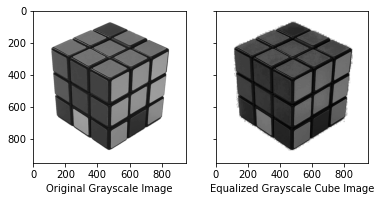

In [ ]:
# 2. Compute equalized image
image_equalized=imageEqualization(image_gray)
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.imshow(image_gray,cmap='gray')
ax1.set_xlabel('Original Grayscale Image')
ax2.imshow(image_equalized,cmap='gray')
ax2.set_xlabel('Equalized Grayscale Cube Image')

**2. Explain your observations here:**

*Your Answer*

>  Equalized Grayscale Cube Image became darker

Text(0.5, 0, 'Intensity Value')

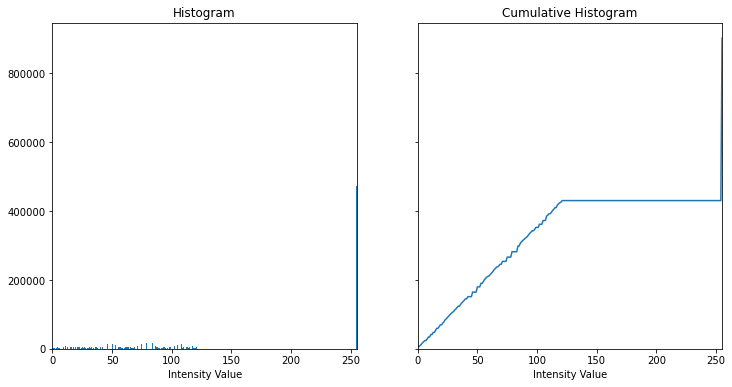

In [ ]:
# 3. Compute the histogram and cumulative histogram of the equalized image
hist=histogram(image_equalized)
H=cumulativeHistogram(hist)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6),sharey=True,sharex=True)
ax1.bar(x=range(0,256),height=hist)
ax1.set_title('Histogram')
ax1.set_xlim(0,255)
ax1.set_xlabel('Intensity Value')

ax2.plot(H)
ax2.set_title('Cumulative Histogram')
ax2.set_xlabel('Intensity Value')

**3. Explain your observations here:**

*Your Answer* 
> Cumulative histogram curve is smoother